# 데이터 분류기

# 데이터 이해

In [34]:
import pandas as pd

In [35]:
df = pd.read_csv('sample_data.csv', skiprows=1)
df.head()

,CONTR_KEY,WRK_TYPE,CONTR_NO,CONTR_SIZE,CONTR_LOAD_STS,BP_NM,SP_BLK,REL_BLK
0,25629,IN,FTAU10,20,F,한도물류,A,A
1,25306,OT,HDMU68,40,E,로드스타,R,R
2,24852,OT,GCXU57,40,F,DTC,B,B
3,25605,IN,OOCU50,40,F,태성로지스,D,D
4,23610,OT,EITU94,40,F,태성로지스,NaN,D


In [36]:
# 데이터의 수 (레코드수, 특징수)
df.shape

(198, 8)

In [37]:
df.dtypes # 데이터 유형

CONTR_KEY          int64
WRK_TYPE          object
CONTR_NO          object
CONTR_SIZE         int64
CONTR_LOAD_STS    object
BP_NM             object
SP_BLK            object
REL_BLK           object
dtype: object

In [38]:
# 기본적인 통계
df.describe()

,CONTR_KEY,CONTR_SIZE
count,198.000000,198.000000
mean,27010.398990,33.737374
std,1512.653452,9.298857
min,22760.000000,20.000000
25%,25463.250000,20.000000
50%,27991.500000,40.000000
75%,28057.500000,40.000000
max,28155.000000,40.000000


# 데이터 전처리

In [39]:
# 문자열 카테고리값으로 변환
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].astype('category')

df.dtypes

CONTR_KEY            int64
WRK_TYPE          category
CONTR_NO          category
CONTR_SIZE           int64
CONTR_LOAD_STS    category
BP_NM             category
SP_BLK            category
REL_BLK           category
dtype: object

In [40]:
# 모든 카테고리값을 출력
category_values = {col: df[col].cat.categories for col in categorical_columns}
# category_values

# 특정 카테고리값을 출력
df['BP_NM'].cat.categories

Index(['DTC', 'HK종합운수', 'KCTC부산', 'SITC', 'SKON', '더블피씨', '덕창로지스틱스', '동우로지스틱',
       '디앤디로직스', '로드스타', '삼일익스프레스', '서중로직스', '에스에이치피물류', '영풍물류', '우진종합물류',
       '유니온로지스', '지투비', '태성로지스', '트레이스로지스틱스', '한도물류', '한타특수운송'],
      dtype='object')

In [41]:
# 카테고리 데이터에 대한 표현 통계
df[categorical_columns].describe()

,WRK_TYPE,CONTR_NO,CONTR_LOAD_STS,BP_NM,SP_BLK,REL_BLK
count,198,198,198,198,193,198
unique,2,186,2,21,6,6
top,IN,TXGU70,F,태성로지스,A,A
freq,136,2,184,64,60,62


# 데이터 탐색 (상관관계 분석)

In [42]:
# 카테고리 값을 숫자로 변환
df_copy = df.copy()
for col in categorical_columns:
    df_copy[col] = df_copy[col].cat.codes

In [43]:
df_copy.corr()

,CONTR_KEY,WRK_TYPE,CONTR_NO,CONTR_SIZE,CONTR_LOAD_STS,BP_NM,SP_BLK,REL_BLK
CONTR_KEY,1.000000,-0.937569,0.118860,0.227375,0.119922,0.080604,0.384894,0.281532
WRK_TYPE,-0.937569,1.000000,-0.134634,-0.225095,-0.068661,-0.103247,-0.342967,-0.286132
CONTR_NO,0.118860,-0.134634,1.000000,0.100280,0.064466,0.011712,0.070398,0.087505
CONTR_SIZE,0.227375,-0.225095,0.100280,1.000000,-0.058791,0.163479,0.785694,0.826965
CONTR_LOAD_STS,0.119922,-0.068661,0.064466,-0.058791,1.000000,-0.045351,-0.128209,-0.170462
BP_NM,0.080604,-0.103247,0.011712,0.163479,-0.045351,1.000000,0.377021,0.409501
SP_BLK,0.384894,-0.342967,0.070398,0.785694,-0.128209,0.377021,1.000000,0.950548
REL_BLK,0.281532,-0.286132,0.087505,0.826965,-0.170462,0.409501,0.950548,1.000000


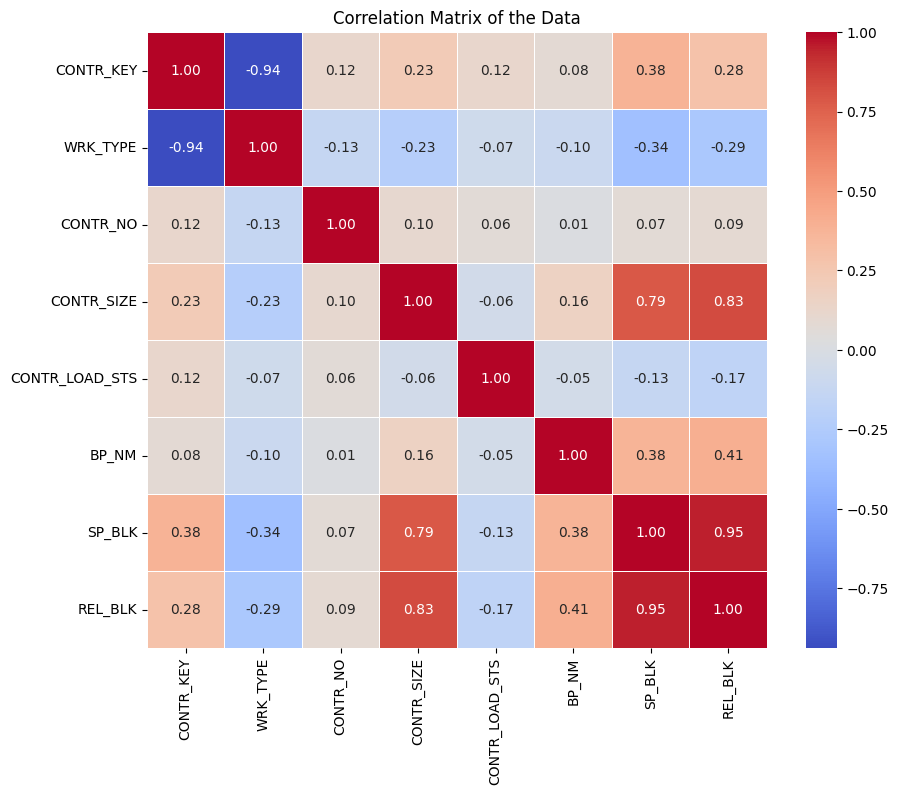

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_copy.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of the Data')
plt.show()

# 랜덤 포레스트 분류기

* 일부 컬럼만 사용해서 분류기를 만들어보기

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [55]:
# Prepare the data
X = df_copy.drop(['REL_BLK'], axis=1)  # Features
y = df_copy['REL_BLK']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy

0.725

In [62]:
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         4
           2       0.33      0.29      0.31         7
           3       0.80      0.73      0.76        11
           4       0.38      0.50      0.43         6
           5       1.00      1.00      1.00         1

    accuracy                           0.73        40
   macro avg       0.75      0.75      0.75        40
weighted avg       0.73      0.72      0.73        40



# 결과 예측

In [57]:
from sklearn.metrics import confusion_matrix
import numpy as np

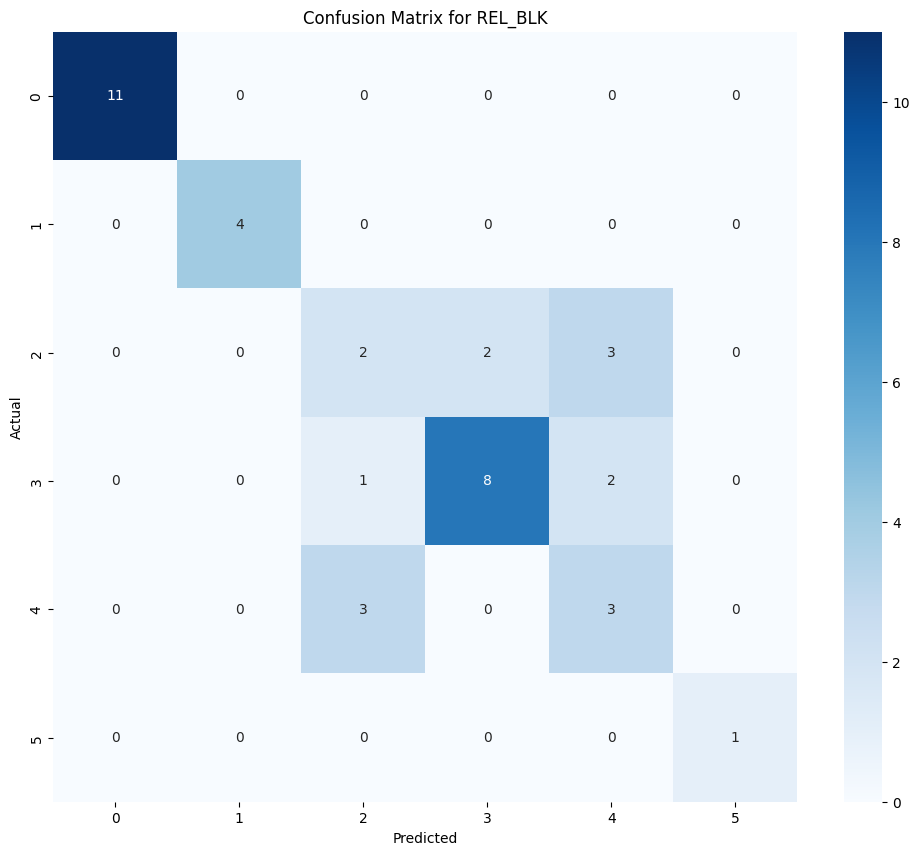

In [58]:
cm_rel_blk = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap for REL_BLK
plt.figure(figsize=(12, 10))
sns.heatmap(cm_rel_blk, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for REL_BLK')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()